In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
import seaborn as sns

Importing all the important libraries


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving CSX_train.csv to CSX_train.csv


In [ ]:
train=pd.read_csv('CSX_train.csv')#we have to read the train file

In [ ]:
train.head()#reading the file of train

,Unnamed: 0,type,time,dayofweek,models,params,queuelen,trials,duration
0,1178,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0
1,877,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0
2,4233,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0
3,4134,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0
4,3598,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0


In [ ]:
train.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)#Renaming the column so that we can use it further

In [ ]:
train.head()

,ID,type,time,dayofweek,models,params,queuelen,trials,duration
0,1178,9.0,0.413889,3.0,21.0,535.0,0.0,40.0,0.0
1,877,9.0,0.643056,5.0,9.0,2682.0,0.0,40.0,0.0
2,4233,13.0,0.607639,4.0,32.0,3305.0,0.0,40.0,0.0
3,4134,8.0,0.643750,4.0,3.0,22023.0,0.0,40.0,0.0
4,3598,12.0,0.519444,3.0,8.0,3707.0,0.0,40.0,0.0


In [ ]:
id=train['ID'].values#storing id values so we can use it later for attachement in the data

In [ ]:
train.isna().sum()#seeing number of null values

ID             0
type         360
time           0
dayofweek      0
models         0
params       273
queuelen       0
trials         0
duration       0
dtype: int64

In [ ]:
train.dtypes

ID             int64
type         float64
time         float64
dayofweek    float64
models       float64
params       float64
queuelen     float64
trials       float64
duration     float64
dtype: object

In [ ]:
#Now we will drop the id column as it is of no use 
train.drop(['ID','dayofweek'], axis=1,inplace=True)

In [ ]:
train.head()

,type,time,models,params,queuelen,trials,duration
0,9.0,0.413889,21.0,535.0,0.0,40.0,0.0
1,9.0,0.643056,9.0,2682.0,0.0,40.0,0.0
2,13.0,0.607639,32.0,3305.0,0.0,40.0,0.0
3,8.0,0.643750,3.0,22023.0,0.0,40.0,0.0
4,12.0,0.519444,8.0,3707.0,0.0,40.0,0.0


KeyError: ignored

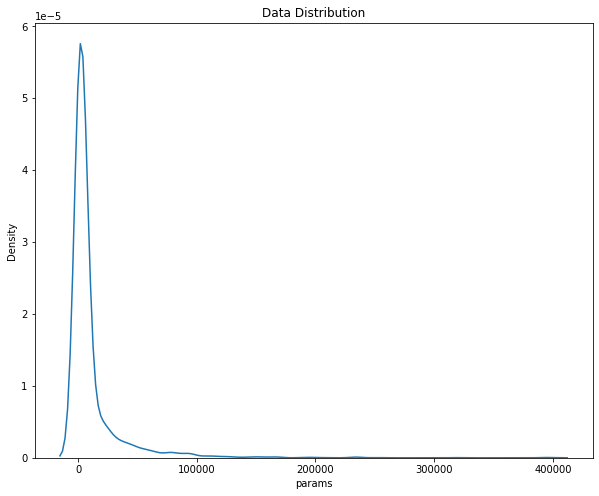

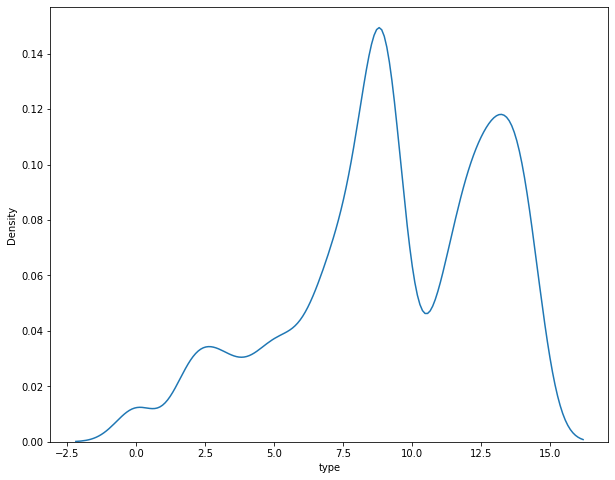

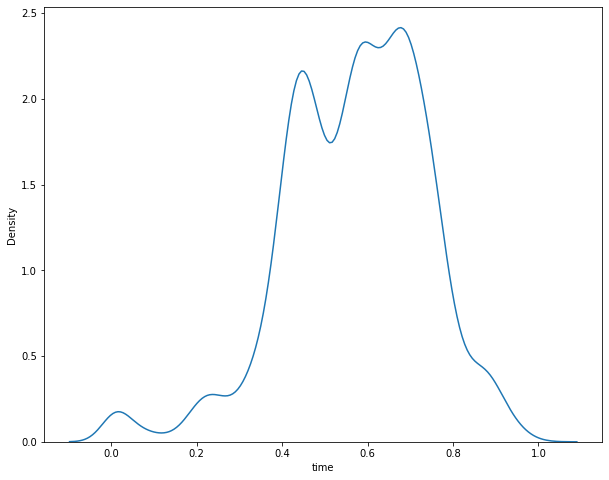

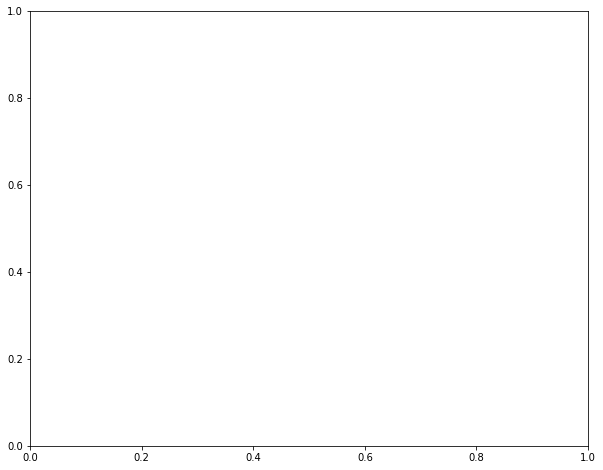

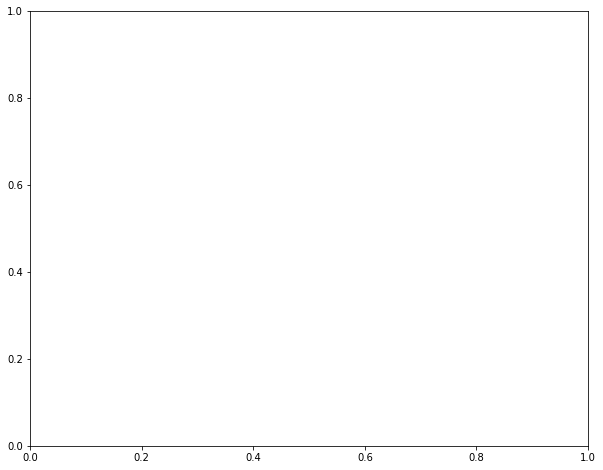

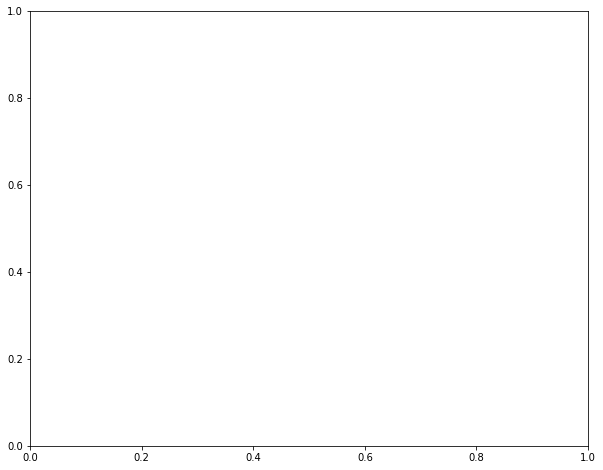

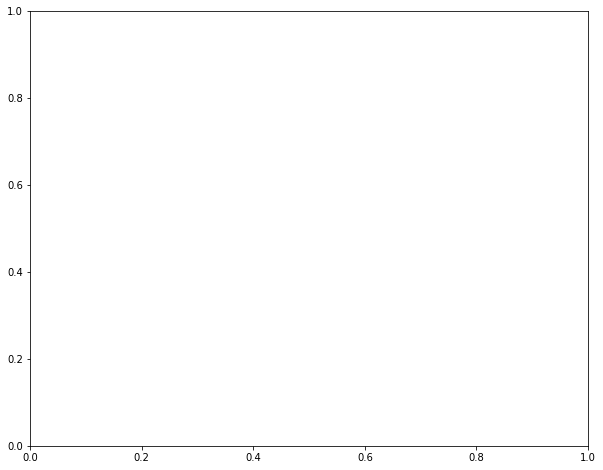

In [ ]:
fig,(ax1)=plt.subplots(ncols=1,figsize=(10,8))
fig,(ax2)=plt.subplots(ncols=1,figsize=(10,8))
fig,(ax3)=plt.subplots(ncols=1,figsize=(10,8))
fig,(ax4)=plt.subplots(ncols=1,figsize=(10,8))
fig,(ax5)=plt.subplots(ncols=1,figsize=(10,8))
fig,(ax6)=plt.subplots(ncols=1,figsize=(10,8))
fig,(ax7)=plt.subplots(ncols=1,figsize=(10,8))
ax1.set_title('Data Distribution')
sns.kdeplot(train['params'],ax=ax1)
sns.kdeplot(train['type'],ax=ax2)
sns.kdeplot(train['time'],ax=ax3)
sns.kdeplot(train['dayofweek'],ax=ax4)
sns.kdeplot(train['models'],ax=ax5)
sns.kdeplot(train['queuelen'],ax=ax6)
sns.kdeplot(train['trials'],ax=ax7)
#type is a skewed distribution so we will replace it by median
#params is a skewed distribution to right so we will replace by median

In [ ]:
train[['type','params']] = train[['type','params']].fillna(train[['type','params']].mean())

In [ ]:
train.head()

In [ ]:
train[['type','params']] = train[['type','params']].fillna(train[['type','params']].mean())
#We will fill the missing values with median instead of mean as it is not a symmetric distribution

In [ ]:
#After going through the datasets we found out that params,models,queuelen,trials had outliers so we will scale the data using robust scaler 

In [ ]:
train.isna().sum()

type        0
time        0
models      0
params      0
queuelen    0
trials      0
duration    0
dtype: int64

In [ ]:
sns.kdeplot(train['params'],ax=ax1)

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


mms1=RobustScaler()
train[['type','time','models','params','trials','duration']]= mms1.fit_transform(train[['type','time','models','params','trials','duration']])
train[['queuelen']]= mms1.fit_transform(train[['queuelen']])

In [ ]:
train.head()

,type,time,models,params,queuelen,trials,duration
0,0.00,-0.724189,0.380952,-0.277376,0.0,0.0,0.0
1,0.00,0.249263,-0.190476,-0.057948,0.0,0.0,0.0
2,1.00,0.098820,0.904762,0.005723,0.0,0.0,0.0
3,-0.25,0.252212,-0.476190,1.918736,0.0,0.0,0.0
4,0.75,-0.275811,-0.238095,0.046808,0.0,0.0,0.0


In [ ]:
train.isna().sum()

type        0
time        0
models      0
params      0
queuelen    0
trials      0
duration    0
dtype: int64

In [ ]:
train['duration'].value_counts()

0.0    1767
1.0    1070
2.0     418
3.0     209
Name: duration, dtype: int64

In [ ]:
Y=train.loc[:,'duration']

In [ ]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: duration, dtype: float64

In [ ]:
X=train
X.head()
X.drop(['duration'],axis=1,inplace=True)

In [ ]:
X.isna().sum()

type        0
time        0
models      0
params      0
queuelen    0
trials      0
dtype: int64

In [ ]:
Y.isna().sum()

0

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving CSX_test.csv to CSX_test.csv


In [ ]:
test=pd.read_csv('CSX_test.csv')

In [ ]:
test.head()

,ID,type,time,dayofweek,models,params,queuelen,trials
0,2439,NaN,0.590972,2,13,4615.0,0,40
1,1213,9.0,0.545833,7,33,552.0,0,40
2,2659,14.0,0.510417,3,2,2890.0,0,40
3,17,NaN,0.518056,3,9,1126.0,0,40
4,3800,11.0,0.376389,2,23,47164.0,0,40


In [ ]:
id1=test['ID'].values

In [ ]:
test.drop(['ID','dayofweek'],axis=1,inplace=True)

In [ ]:
test.isna().sum()

type        66
time         0
models       0
params      69
queuelen     0
trials       0
dtype: int64

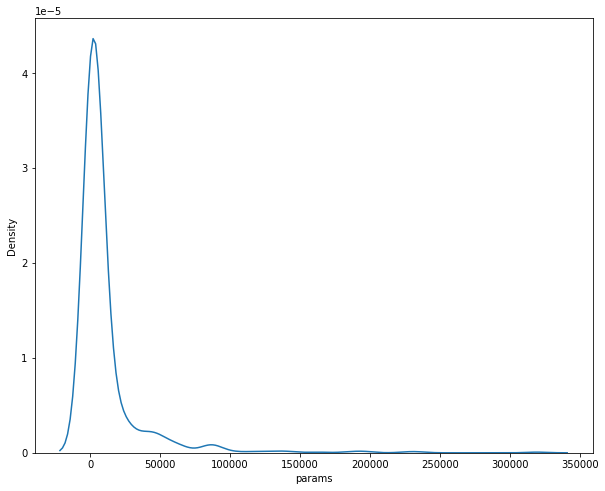

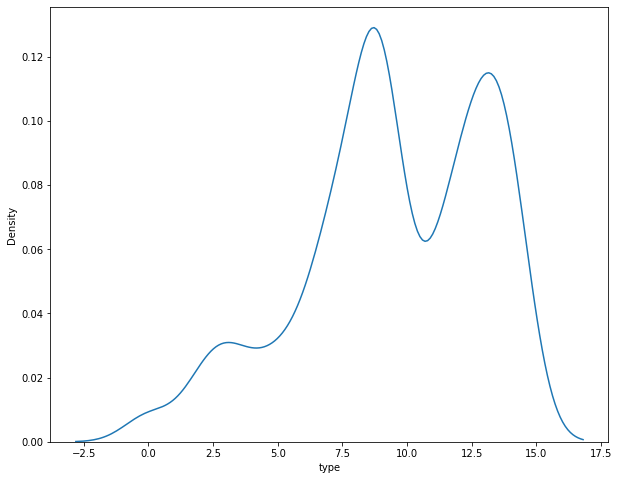

In [ ]:
fig,(ax1)=plt.subplots(ncols=1,figsize=(10,8))
fig,(ax2)=plt.subplots(ncols=1,figsize=(10,8))
sns.kdeplot(test['params'],ax=ax1)
sns.kdeplot(test['type'],ax=ax2)

In [ ]:
test.head()

,type,time,models,params,queuelen,trials
0,NaN,0.590972,13,4615.0,0,40
1,9.0,0.545833,33,552.0,0,40
2,14.0,0.510417,2,2890.0,0,40
3,NaN,0.518056,9,1126.0,0,40
4,11.0,0.376389,23,47164.0,0,40


In [ ]:
test[['type','params']] = test[['type','params']].fillna(test[['type','params']].mean())

In [ ]:
test.isna().sum()

type        0
time        0
models      0
params      0
queuelen    0
trials      0
dtype: int64

In [ ]:
X_test=test

In [ ]:
mms1=RobustScaler()
test[['type','time','models','params','trials']]= mms1.fit_transform(test[['type','time','models','params','trials']])
test[['queuelen']]= mms1.fit_transform(test[['queuelen']])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X.isna().sum()

type        0
time        0
models      0
params      0
queuelen    0
trials      0
dtype: int64

In [ ]:
X.dtypes

type        float64
time        float64
models      float64
params      float64
queuelen    float64
trials      float64
dtype: object

In [ ]:
Y.isna().sum()

0

In [ ]:
test.isna().sum()

type        0
time        0
models      0
params      0
queuelen    0
trials      0
dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [ ]:
Y.value_counts()

0.000000    1767
0.333333    1070
0.666667     418
1.000000     209
Name: duration, dtype: int64

In [ ]:
lr=DecisionTreeClassifier()
lr.fit(x_train,y_train)
lr.predict(X_test)
pred16=lr.predict(X_test)
pred17=lr.predict(x_test)
from sklearn.metrics import f1_score
(accuracy_score(y_test,pred17))



0.7368881118881119

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf.predict(X_test)
pred4=clf.predict(X_test)
pred5=clf.predict(x_test)
from sklearn.metrics import f1_score
f1_score(y_test,pred5, average=None)

(accuracy_score(y_test,pred5))


0.8033216783216783

In [ ]:
print(pred4)

[0. 1. 1. 0. 0. 3. 0. 0. 0. 1. 0. 1. 1. 1. 3. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 2. 1. 0. 2. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 3. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 1. 0. 0.
 0. 0. 1. 3. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 2. 0. 0. 1. 1. 1. 2. 0. 1.
 1. 0. 2. 1. 2. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2. 3. 1. 1. 0. 3.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 2. 2. 3. 1. 0. 0. 0. 0. 2. 1. 1. 0. 0. 0.
 3. 1. 0. 1. 2. 0. 0. 0. 0. 0. 3. 0. 1. 0. 0. 0. 0. 0. 1. 0. 2. 3. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 2. 2. 1. 1. 0. 0. 0.
 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 3. 0. 0. 0. 1. 2. 0. 0.
 0. 1. 0. 1. 0. 0. 2. 1. 2. 0. 0. 1. 3. 1. 1. 1. 0. 0. 0. 1. 0. 3. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 2. 1. 0. 3. 1. 1. 2. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 3. 0. 2. 1. 0. 1. 1. 0. 0. 2. 0. 1. 0. 0. 0. 2. 3. 0. 0. 0. 1. 3. 0.
 3. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.

In [ ]:

rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [10,50,5,25,100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X,Y)
print(f'The best hyperparameters are {CV_rfc.best_params_}')

KeyboardInterrupt: ignored

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, Y)
y_pred = xgb_model.predict(X_test)
pred2=xgb_model.predict(X_test)
print(pred2)



[0. 1. 1. 0. 0. 3. 0. 1. 0. 0. 1. 0. 0. 1. 3. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 2. 0. 0. 2. 1. 0. 0. 1. 0. 3. 1. 1. 0. 0. 1. 1. 3. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 3. 1. 0. 1. 0. 0.
 0. 0. 1. 3. 0. 2. 0. 1. 0. 1. 2. 1. 1. 0. 0. 2. 0. 0. 1. 1. 1. 2. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 3. 0. 1. 0. 3.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 3. 1. 3. 1. 0. 0. 0. 0. 2. 1. 1. 1. 0. 0.
 3. 0. 0. 1. 2. 0. 0. 0. 1. 0. 3. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 3. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 2. 1. 1. 2. 0. 0. 1.
 0. 1. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 2. 3. 0. 0. 0. 1. 2. 0. 0.
 1. 0. 0. 1. 0. 0. 2. 1. 2. 1. 0. 1. 3. 1. 1. 1. 0. 0. 0. 1. 0. 2. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 3. 0. 2. 1. 0. 1. 1. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 1. 3. 1.
 3. 0. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.

In [ ]:
# Model and performance evaluation
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [ ]:

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}
kfold = StratifiedKFold(n_splits=3,random_state=0,shuffle=True)
grid_search= GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=kfold,
                   scoring='roc_auc',
                   verbose=2, refit=True)
# Fit grid search
grid_result = grid_search.fit(X,Y)
# Print grid search summary
grid_result
# Print the best score and the corresponding hyperparameters


print(f'The best hyperparameters are {grid_result.best_params_}')

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X,Y)
svm_predictions = svm_model_linear.predict(X_test)
print(svm_predictions)

[0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 1. 3. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 3.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 3. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 3. 2. 0. 0. 0. 3. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
from sklearn.naive_bayes import GaussianNB
lr1=GaussianNB()
lr1.fit(X,Y)
lr1.predict(X_test)
pred1=lr1.predict(X_test)
print(pred1)

[0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 0. 0. 0. 3. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 2. 3. 0. 0. 0. 0. 2. 0. 0. 2. 2. 0. 3.
 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 3. 2. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 3. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 3. 2. 0. 0. 0. 3. 3. 2. 2. 0. 0. 0. 2. 0. 0. 0. 0.
 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 2. 0. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0.
 0. 3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
from sklearn.svm import SVC
lr2 = SVC(kernel = 'linear', C = 1)
lr2=GaussianNB()
lr2.fit(X,Y)
lr2.predict(X_test)
pred1=lr2.predict(X_test)
print(pred1)

In [ ]:
len(pred)

In [ ]:
len(id1)

In [ ]:
df1=pd.DataFrame({'id':id1, 'price1':pred4})

In [ ]:
from google.colab import files
df1.to_csv('outputdhruv16.csv', encoding = 'utf-8-sig') 
files.download('outputdhruv16.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>